In [1]:
from collections import namedtuple
Deletion = namedtuple('Deletion', ['family', 'chrom', 
                                   'start_pos', 'end_pos', 'start_index', 'end_index', 'length',
                                   'individuals',
                                   'doubledel', 'singledel', 'nodel',
                                   'mat_del', 'pat_del',
                                   'no_mat_del', 'no_pat_del',
                                   'mom_del', 'dad_del'])


In [65]:
family_sizes = [3, 4, 5]
phase_dir = '../phased_unknown_cutoff'
data_dir = '../split_gen_miss'
#phase_dir = '../phased_ssc'
#data_dir = '../split_gen_miss_ssc'

In [66]:
import numpy as np
from collections import defaultdict

# pull families with data for all chromosomes
all_positions = set()
family_to_chroms = defaultdict(set)
family_to_num_dels = defaultdict(int)
family_chrom_to_num_dels = defaultdict(int)
family_to_individuals = dict()
chroms = [22]#range(1, 23)
for chrom in chroms:
    print(chrom)

    for j in family_sizes:
        try:
            with open('%s/chr.%s.familysize.%d.phased.txt' % (phase_dir, chrom, j), 'r')  as f:
                next(f) # skip header
                for line in f:
                    pieces = line.strip().split('\t')
                    family_key = pieces[0]
                    inheritance_state = [int(x) for x in pieces[1:(1+(j*2))]]
                    start_pos, end_pos = [int(x) for x in pieces[(1+(j*2)):(3+(j*2))]]
                    all_positions.add((chrom, start_pos))
                    all_positions.add((chrom, end_pos))
                    family_to_chroms[family_key].add(chrom)
                    
                    num_dels = len([x for x in inheritance_state[:4] if x == 0])
                    family_to_num_dels[family_key] += num_dels 
                    family_chrom_to_num_dels[(family_key, chrom)] += num_dels
        except FileNotFoundError:
            print('File not found', 'chrom', chrom, 'family size', j)
        except StopIteration:
            print('File empty', 'chrom', chrom, 'family size', j)
    
pos_to_index = dict([(x, i) for i, x in enumerate(sorted(all_positions))])
max_index = len(pos_to_index)

have_all_chroms = set([k for k, v in family_to_chroms.items() if len(v)==len(chroms) and k.split('.')[0]])
print('Num families with all chroms', len(have_all_chroms))


22
Num families with all chroms 89


In [67]:
family_to_individuals = dict()

for chrom in chroms:
    for j in family_sizes:
        try:
            with open('%s/chr.%s.familysize.%d.families.txt' % (phase_dir, chrom, j), 'r')  as f:
                next(f) # skip header
                for line in f:
                    pieces = line.strip().split('\t')
                    family_key = pieces[0]
                    family_to_individuals[family_key] = pieces[1:(1+j)]
        except FileNotFoundError:
            print('File not found', 'chrom', chrom, 'fammily size', j)
        except StopIteration:
            print('File empty', 'chrom', chrom, 'family size', j)


min length 0 max length 47 avg 2.6741573033707864 median 1.0
[('AU1495303.AU1495202.AU1495201', 3, 47), ('AU0148.AU014801.AU014802', 5, 10), ('AU0133.AU013301.AU013302', 4, 9), ('AU0247.AU024701.AU024702', 4, 8), ('AU0268.AU026801.AU026802', 4, 7), ('AU0358.AU035804.AU035803', 4, 7), ('AU0022.AU002201.AU002202', 5, 7), ('AU0306.AU030601.AU030602', 4, 6), ('AU0350.AU035001.AU035002', 4, 6), ('AU0531.AU0531202.AU0531201', 4, 6)]


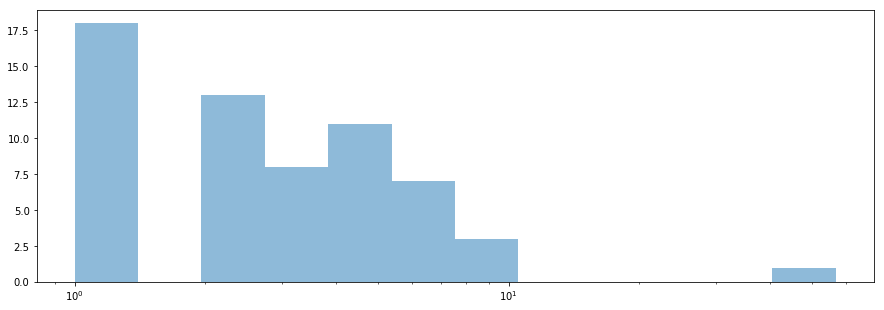

In [68]:
import matplotlib.pyplot as plt
import math

plt.figure(figsize=(15, 5))
base = 1.4

max_length = max(family_to_num_dels.values()) 
min_length = min(family_to_num_dels.values()) 
mean_length = np.mean(list(family_to_num_dels.values()))
median_length = np.median(list(family_to_num_dels.values()))
print('min length', min_length, 'max length', max_length, 'avg', mean_length, 'median', median_length)
families = list(family_to_num_dels.keys())
print(sorted(list(zip(families, 
                      [len(family_to_individuals[k]) for k in families],
                     [family_to_num_dels[k] for k in families])), key=lambda x: family_to_num_dels[x[0]], reverse=True)[:10])

plt.hist(family_to_num_dels.values(), bins=[pow(base, i) for i in range(math.ceil(math.log(max_length, base))+1)], alpha=0.5)

plt.gca().set_xscale("log")

plt.show()

min length 0 max length 47 avg 2.6741573033707864 median 1.0
1


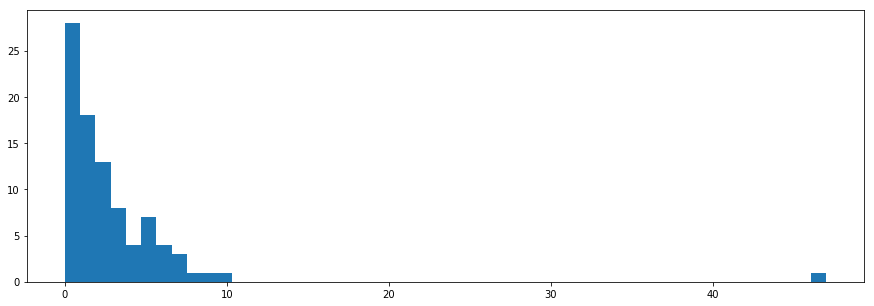

In [69]:
import matplotlib.pyplot as plt
import math

plt.figure(figsize=(15, 5))
base = 1.4

max_length = max(family_chrom_to_num_dels.values()) 
min_length = min(family_chrom_to_num_dels.values()) 
mean_length = np.mean(list(family_chrom_to_num_dels.values()))
median_length = np.median(list(family_chrom_to_num_dels.values()))
print('min length', min_length, 'max length', max_length, 'avg', mean_length, 'median', median_length)
famchroms = list([(k, c) for k, c in family_chrom_to_num_dels.keys()])
so = sorted(list(zip(famchroms, 
                      [len(family_to_individuals[k]) for k, c in famchroms],
                     [family_chrom_to_num_dels[k] for k in famchroms])), 
             key=lambda x: family_chrom_to_num_dels[x[0]], reverse=True)


#print(so[:50])
print(len(set([x[0][0] for x in so if x[2]>10])))

plt.hist([family_chrom_to_num_dels[k] for k in family_chrom_to_num_dels.keys()], bins=50)#, bins=[pow(base, i) for i in range(math.ceil(math.log(max_length, base))+1)], alpha=0.5)

#plt.gca().set_xscale("log")

plt.show()

In [58]:
f = 0
for fam in families:
    c = [family_chrom_to_num_dels[(fam, c)] for c in chroms]
    if max(c) > 15:
        print(fam)
        f += 1
print(f)

AU1495303.AU1495202.AU1495201
AU0012.AU001201.AU001202
AU0095.AU009501.AU009502
AU0329.AU032901.AU032902
AU0782.AU0782202.AU0782201
AU0828.AU082801.AU082802
AU0866.AU0866202.AU0866201
AU0923.AU0923202.AU0923201
AU0941.AU0941202.AU0941201
AU0951.AU0951202.AU0951201
AU1221.AU1221202.AU1221201
AU0714.AU0714202.AU0714201
AU0959.AU0959202.AU0959201
AU1070.AU1070202.AU1070201
AU1103.AU1103202.AU1103201
AU1177.AU1177202.AU1177201
AU1178.AU1178202.AU1178201
AU1197.AU1197202.AU1197201
AU1299.AU1299202.AU1299201
AU1342.AU1342202.AU1342201
AU1437.AU1437202.AU1437201
AU1529.AU1529202.AU1529201
AU1544.AU1544202.AU1544201
AU1296.AU1296202.AU1296201
AU1441.AU1441202.AU1441201
AU1508.AU1508202.AU1508201
AU1641.AU1641202.AU1641201
AU1692.AU1692202.AU1692201
AU1890.AU1890202.AU1890201
AU1965.AU1965202.AU1965201
AU1977.AU1977202.AU1977201
AU3303.AU3303202.AU3303201
AU1623.AU1623202.AU1623201
AU2172.AU2172202.AU2172201
AU2752.AU2752202.AU2752201
AU3347.AU3347202.AU3347201
AU3551.AU3551202.AU3551201
AU0262

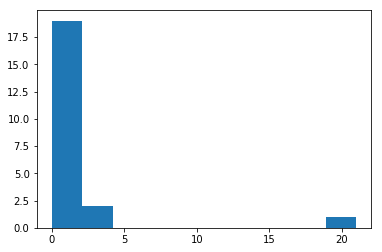

In [55]:
import random

fam = 'AU0012.AU001201.AU001202'
#fam = random.choice(families)
plt.hist([family_chrom_to_num_dels[(fam, c)] for c in chroms])
plt.show()

In [37]:
# pull monozygotic mutiples
monozygotic_multiple_families = set()
with open('../data/160826.iHART.db.query.csv', 'r') as f:
    next(f)
    for line in f:
        pieces = line.split(',')
        if 'MZ' in pieces[11]:
            monozygotic_multiple_families.add(pieces[3])
print('Num families with monozygotic multiples', len(monozygotic_multiple_families))


Num families with monozygotic multiples 96
